In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [22]:

data = pd.read_csv('sp500_stocks.zip')
df = data[data['Symbol'] == 'WFC']

print(df)
df = df.dropna()

# Select relevant features ('Close' is the target variable)
features = ['Open', 'High', 'Low', 'Volume'] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Close'], test_size=0.2, random_state=42)



               Date Symbol  Adj Close      Close       High        Low  \
1775832  2010-01-04    WFC  19.864773  27.320000  27.480000  26.820000   
1775833  2010-01-05    WFC  20.410105  28.070000  28.240000  27.240000   
1775834  2010-01-06    WFC  20.439198  28.110001  28.330000  27.790001   
1775835  2010-01-07    WFC  21.180855  29.129999  29.430000  27.920000   
1775836  2010-01-08    WFC  20.984533  28.860001  29.350000  28.600000   
...             ...    ...        ...        ...        ...        ...   
1779466  2024-06-12    WFC  57.299999  57.299999  58.450001  57.160000   
1779467  2024-06-13    WFC  57.270000  57.270000  57.619999  56.689999   
1779468  2024-06-14    WFC  57.400002  57.400002  57.610001  56.619999   
1779469  2024-06-17    WFC  58.240002  58.240002  58.250000  57.070000   
1779470  2024-06-18    WFC  59.049999  59.049999  59.049999  57.900002   

              Open      Volume  
1775832  27.020000  39335700.0  
1775833  27.270000  55416000.0  
1775834  28.

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

X = sm.add_constant(X_train) 
results = sm.OLS(y_train, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.192e+06
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:24:58   Log-Likelihood:                -180.72
No. Observations:                2911   AIC:                             371.4
Df Residuals:                    2906   BIC:                             401.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.032      2.557      0.0

In [40]:

y_pred = model.predict(X_test)
dataset = pd.DataFrame(y_pred,y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean sqaured error:{mse:0.4f}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score:{r2:0.4f}")


Mean sqaured error:0.0791
R2 Score:0.9993


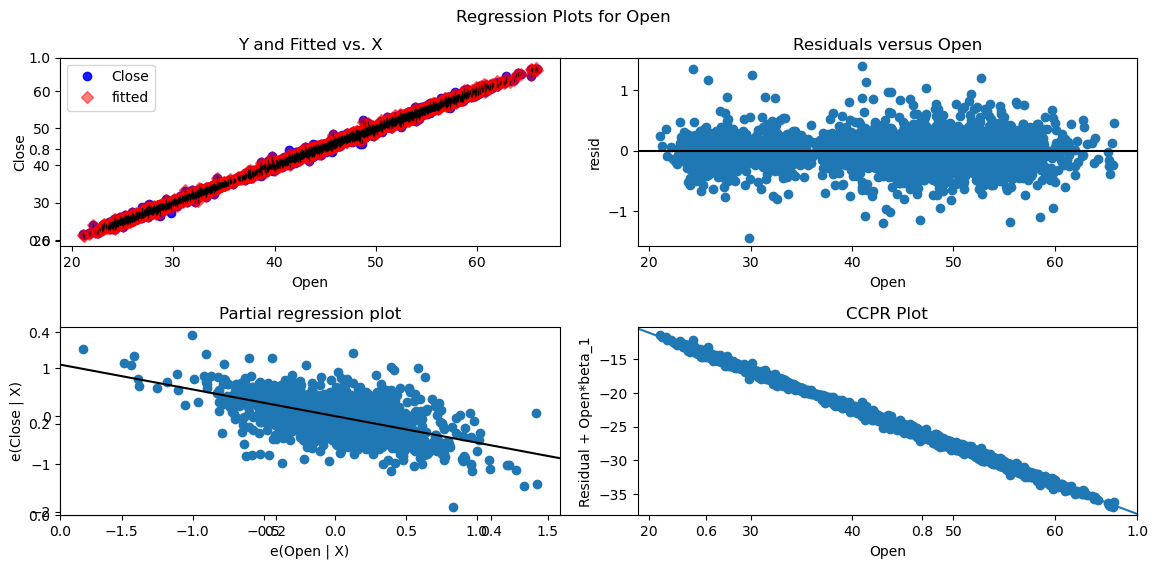

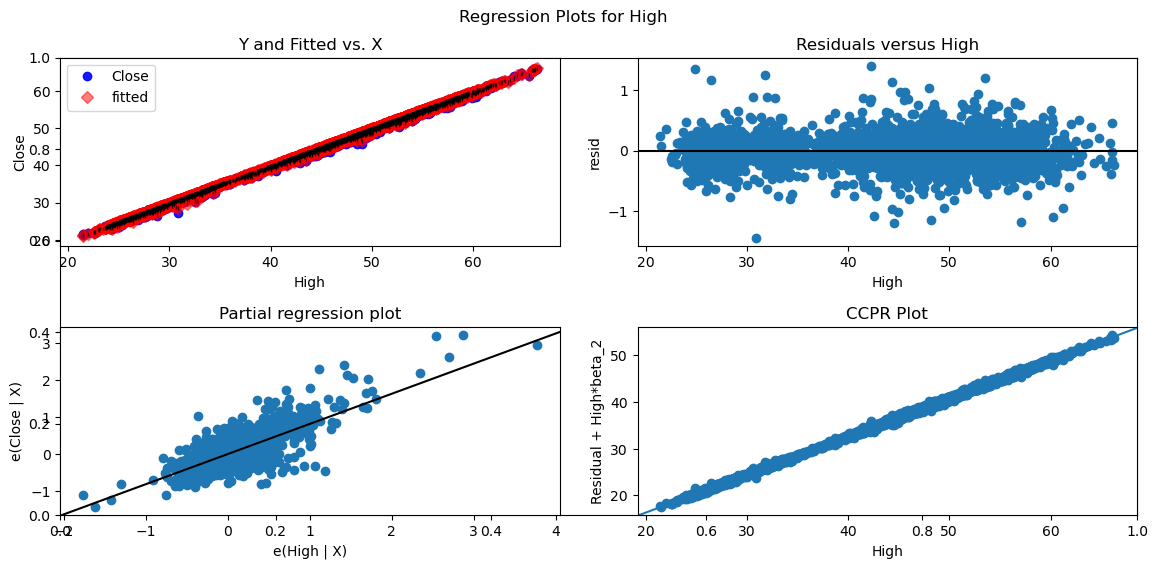

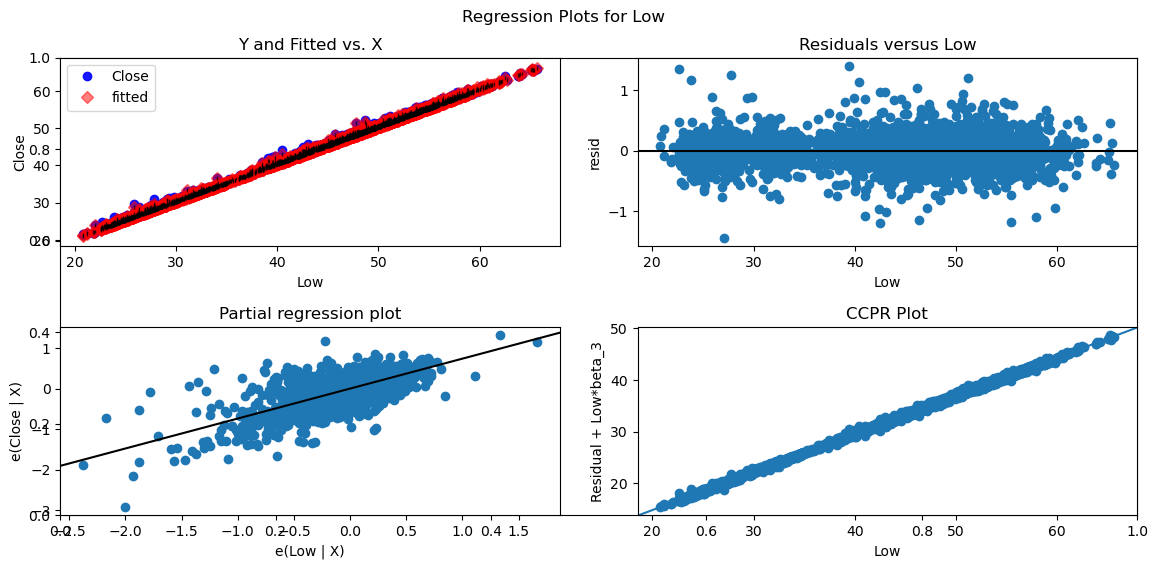

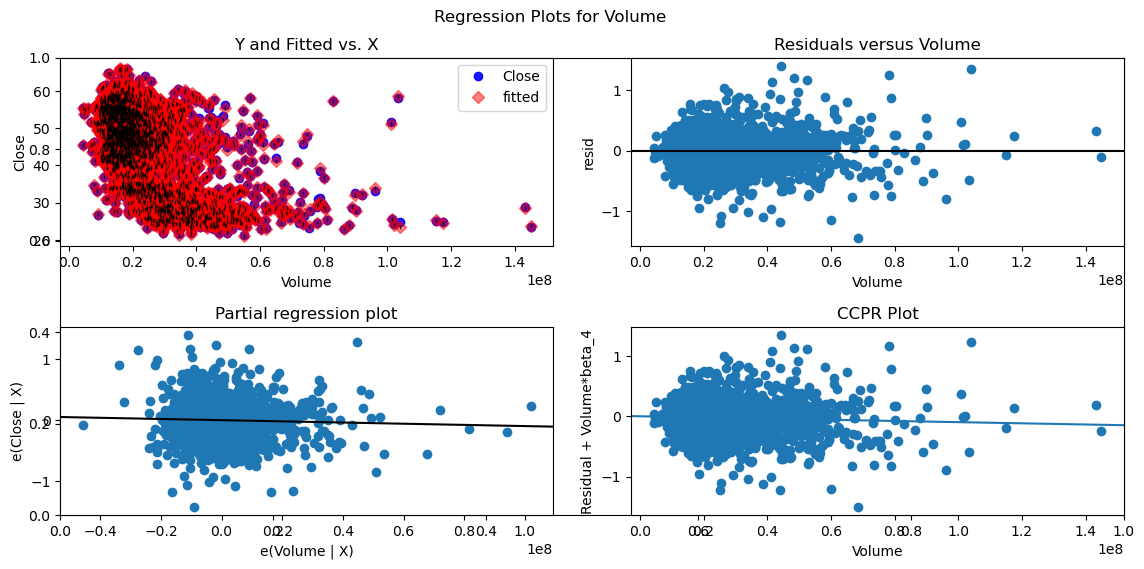

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(12, 6))
sm.graphics.plot_regress_exog(results, 'Open', fig=fig)
plt.show()
fig, axes = plt.subplots(figsize=(12, 6))
sm.graphics.plot_regress_exog(results, 'High',fig=fig)
plt.show()
fig, axes = plt.subplots(figsize=(12, 6))
sm.graphics.plot_regress_exog(results, 'Low',fig=fig)
plt.show()
fig, axes = plt.subplots(figsize=(12, 6))
sm.graphics.plot_regress_exog(results, 'Volume',fig=fig)
plt.show()



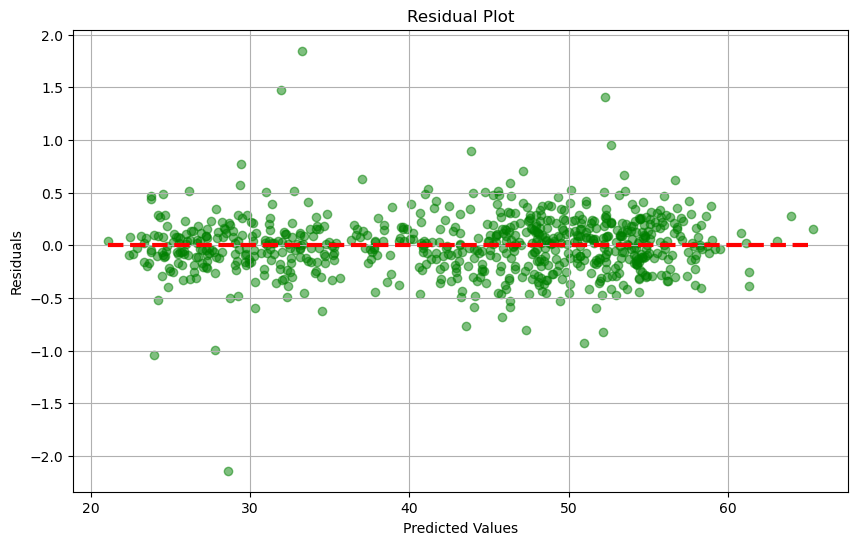

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, color='green', alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed', lw=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

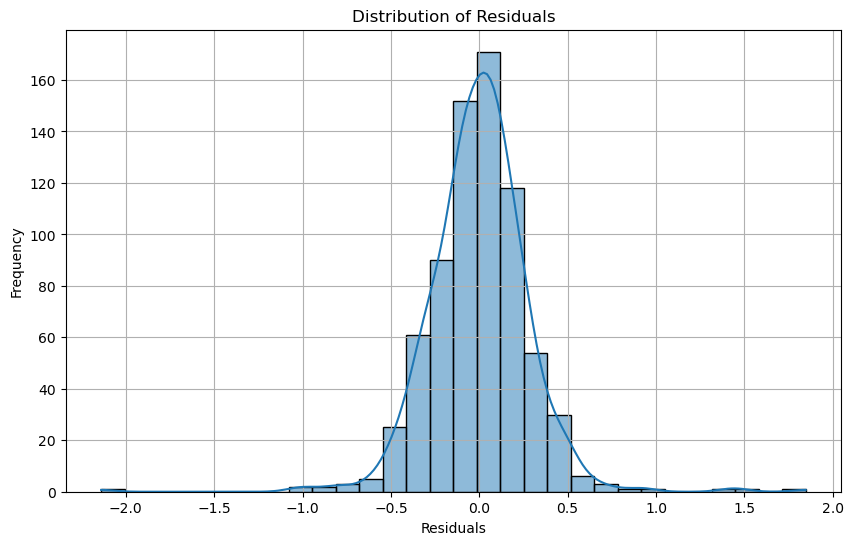

In [26]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


Normal distribution of residuals suggest that linear regression model suits this data set
99% R2 and low MSE suggests the model works well
